In [1]:
import numpy as np 
import scipy as sc
import matplotlib.pyplot as plt 
    
from sklearn.datasets import make_circles

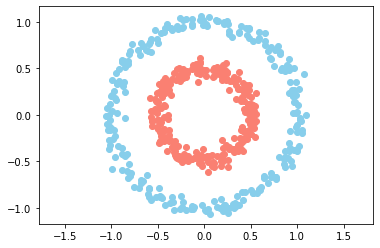

In [2]:
#crear data set

n = 500
p = 2

x,y = make_circles(n_samples = n,factor=0.5,noise = 0.05) # factor=0.5 es la separacion de los circulos

y = y[:,np.newaxis]

plt.scatter(x[y[:,0] == 0,0],x[y[:,0] == 0,1],c="skyblue")
plt.scatter(x[y[:,0] == 1,0],x[y[:,0] == 1,1],c="salmon")
plt.axis("equal")
plt.show()

In [3]:
#Clase de capa red

class neural_layer():
    def __init__(self,n_conn,n_neur,act_f):
        self.act_f = act_f
                        
        self.b = np.random.rand(1,n_neur)*2-1
        self.w = np.random.rand(n_conn,n_neur)*2-1        

In [4]:
#funciones de activacion

sigm = (lambda x: 1/(1 + np.e ** (-x)),
        lambda x: x*(1-x))

In [6]:
l0 = neural_layer(p,4,sigm)
l1 = neural_layer(4,8,sigm)
#...
def create_nn(topology,act_f):
    nn = []
    for l,layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l],topology[l+1],act_f))
    return nn

topology = [p,4,8,1]
create_nn(topology,sigm)

In [8]:
topology = [p,4,8,1]
neural_net = create_nn(topology,sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
           lambda Yp, Yr:(Yp-Yr))

def train(neural_net,x,y,l2_cost,lr=0.5,train=True):
    out = [(None,x)]
    
    #Forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].w + neural_net[l].b #Suma ponderada
        a = neural_net[l].act_f[0](z) #Salida de una neurona - valor de activacion
        out.append((z,a))
        
    #Backward pass
    if train:
        deltas = []
        
        for l in reversed(range(0,len(neural_net))):
            
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(neural_net) - 1:
                deltas.insert(0,l2_cost[1](a,y)*neural_net[l].act_f[1](a))
            else:
                deltas.insert(0,deltas[0]@_w.T*neural_net[l].act_f[1](a))
            _w = neural_net[l].w
            
            #Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0],axis = 0, keepdims=True)*lr
            neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0]*lr
    return out[-1][1]
    
#train(neural_net,x,y,l2_cost,0.5)
    

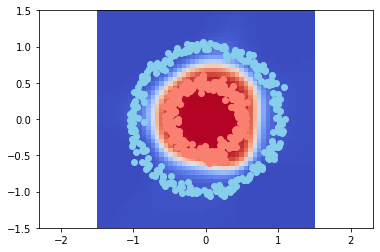

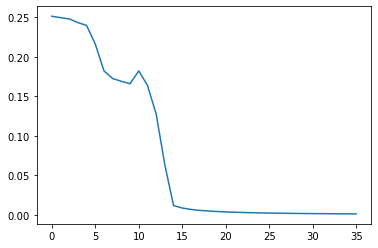

In [14]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology,sigm)

loss = [] #Los costos

for i in range(900):
    pY = train(neural_n,x,y,l2_cost,lr=0.05)
    
    if i % 25 == 0:
        print(pY)
        loss.append(l2_cost[0](pY,y))
        res = 50 #resolucion
        
        _x0 = np.linspace(-1.5,1.5,res)
        _x1 = np.linspace(-1.5,1.5,res)
        
        _y = np.zeros((res,res))
        
        for i0,x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _y[i0,i1] = train(neural_n,np.array([[x0,x1]]),y,l2_cost,train=False)[0][0]
        
        plt.pcolormesh(_x0,_x1,_y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(x[y[:,0] == 0,0],x[y[:,0] == 0,1],c="skyblue")
        plt.scatter(x[y[:,0] == 1,0],x[y[:,0] == 1,1],c="salmon")
                       
        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)
        
